## 获取大户持仓量多空比数据

In [24]:
import os
import logging

from binance_sdk_derivatives_trading_usds_futures.derivatives_trading_usds_futures import (
    DerivativesTradingUsdsFutures,
    ConfigurationRestAPI,
    DERIVATIVES_TRADING_USDS_FUTURES_REST_API_PROD_URL,
)
from binance_sdk_derivatives_trading_usds_futures.rest_api.models import (
    TopTraderLongShortRatioPositionsPeriodEnum,
)

# Configure logging
logging.basicConfig(level=logging.INFO)

# Create configuration for the REST API
configuration_rest_api = ConfigurationRestAPI(
    api_key="66aLkztQkQFuyUQuM83oqYx9ENuZH1SFFbuTSP3ClcGYa9Vqwy5cmQan9QfK7Gzd",
    api_secret="V4lTk3PUCa7jwGAxPybBFzE7fN2Ob09FZR9BbchLOiGtssRnH9cnkfL2O8C7aoQW",
    base_path=os.getenv(
        "BASE_PATH",  DERIVATIVES_TRADING_USDS_FUTURES_REST_API_PROD_URL
    ),
)

# Initialize DerivativesTradingCoinFutures client
client = DerivativesTradingUsdsFutures(config_rest_api=configuration_rest_api)

def top_trader_long_short_ratio_positions():
    try:
        response = client.rest_api.top_trader_long_short_ratio_positions(
            symbol="BEATUSDT",
            period=TopTraderLongShortRatioPositionsPeriodEnum["PERIOD_1h"].value,
            limit=10,
        )

        rate_limits = response.rate_limits
        logging.info(
            f"top_trader_long_short_ratio_positions() rate limits: {rate_limits}"
        )

        data = response.data()
        return data
        logging.info(f"top_trader_long_short_ratio_positions() response: {data}")
    except Exception as e:
        logging.error(f"top_trader_long_short_ratio_positions() error: {e}")
        
top_long_short_ratio = top_trader_long_short_ratio_positions()

INFO:root:top_trader_long_short_ratio_positions() rate limits: []


In [25]:
top_long_short_ratio

[{'symbol': 'BEATUSDT',
  'longAccount': '0.5658',
  'longShortRatio': '1.3032',
  'shortAccount': '0.4342',
  'timestamp': 1767150000000},
 {'symbol': 'BEATUSDT',
  'longAccount': '0.5646',
  'longShortRatio': '1.2969',
  'shortAccount': '0.4354',
  'timestamp': 1767153600000},
 {'symbol': 'BEATUSDT',
  'longAccount': '0.5679',
  'longShortRatio': '1.3143',
  'shortAccount': '0.4321',
  'timestamp': 1767157200000},
 {'symbol': 'BEATUSDT',
  'longAccount': '0.5601',
  'longShortRatio': '1.2731',
  'shortAccount': '0.4399',
  'timestamp': 1767160800000},
 {'symbol': 'BEATUSDT',
  'longAccount': '0.5673',
  'longShortRatio': '1.3110',
  'shortAccount': '0.4327',
  'timestamp': 1767164400000},
 {'symbol': 'BEATUSDT',
  'longAccount': '0.5671',
  'longShortRatio': '1.3099',
  'shortAccount': '0.4329',
  'timestamp': 1767168000000},
 {'symbol': 'BEATUSDT',
  'longAccount': '0.5756',
  'longShortRatio': '1.3563',
  'shortAccount': '0.4244',
  'timestamp': 1767171600000},
 {'symbol': 'BEATUSD

## 转换为DataFrame

In [20]:
import pandas as pd

df = pd.DataFrame(top_long_short_ratio)

def top_long_short_ratio2df(data):
    df = pd.DataFrame(data)
    
    # 时间戳转换为可读日期（毫秒级→秒级→datetime）
    df["timestamp"] = pd.to_datetime(df["timestamp"] // 1000, unit="s")
    df['longShortRatio'] = pd.to_numeric(df['longShortRatio'])
    df['longShortRatio'] = pd.to_numeric(df['longShortRatio'])
    df2 = df.set_index(df["timestamp"])
    
    
    return df2
top_long_short_ratio_df=top_long_short_ratio2df(top_long_short_ratio)

In [21]:
top_long_short_ratio_df

,symbol,longAccount,longShortRatio,shortAccount,timestamp
timestamp,,,,,
2025-12-31 02:00:00,BEATUSDT,0.5651,1.2994,0.4349,2025-12-31 02:00:00
2025-12-31 03:00:00,BEATUSDT,0.5658,1.3032,0.4342,2025-12-31 03:00:00
2025-12-31 04:00:00,BEATUSDT,0.5646,1.2969,0.4354,2025-12-31 04:00:00
2025-12-31 05:00:00,BEATUSDT,0.5679,1.3143,0.4321,2025-12-31 05:00:00
2025-12-31 06:00:00,BEATUSDT,0.5601,1.2731,0.4399,2025-12-31 06:00:00
2025-12-31 07:00:00,BEATUSDT,0.5673,1.3110,0.4327,2025-12-31 07:00:00
2025-12-31 08:00:00,BEATUSDT,0.5671,1.3099,0.4329,2025-12-31 08:00:00
2025-12-31 09:00:00,BEATUSDT,0.5756,1.3563,0.4244,2025-12-31 09:00:00
2025-12-31 10:00:00,BEATUSDT,0.5747,1.3511,0.4253,2025-12-31 10:00:00


## 绘制曲线图

In [23]:
import mplfinance as mpf
import matplotlib.pyplot as plt
mpf.plot(top_long_short_ratio_df, type='line')
plt.show()

ValueError: Column "Open" NOT FOUND in Input DataFrame!
            CHECK that your column names are correct AND/OR
            CHECK for leading or trailing blanks in your column names.

In [236]:
import os
import logging

from binance_sdk_derivatives_trading_coin_futures.derivatives_trading_coin_futures import (
    DerivativesTradingCoinFutures,
    ConfigurationRestAPI,
    DERIVATIVES_TRADING_COIN_FUTURES_REST_API_PROD_URL,
)

from binance_sdk_derivatives_trading_coin_futures.rest_api.models import (
    LongShortRatioPeriodEnum,
)


# Configure logging
logging.basicConfig(level=logging.INFO)

# Create configuration for the REST API
configuration_rest_api = ConfigurationRestAPI(
    api_key="66aLkztQkQFuyUQuM83oqYx9ENuZH1SFFbuTSP3ClcGYa9Vqwy5cmQan9QfK7Gzd",
    # api_key= "O0ambiAxVnDs0pDAtlwVs3uiLR7uH2kh5B12WWWmEersKD9uHipkJZ80I90enw4o",
    # api_secret="",
    api_secret="V4lTk3PUCa7jwGAxPybBFzE7fN2Ob09FZR9BbchLOiGtssRnH9cnkfL2O8C7aoQW",
    base_path=os.getenv(
        "BASE_PATH", DERIVATIVES_TRADING_COIN_FUTURES_REST_API_PROD_URL
    ),
)

# Initialize DerivativesTradingCoinFutures client
client = DerivativesTradingCoinFutures(config_rest_api=configuration_rest_api)

def long_short_ratio():
    try:
        response = client.rest_api.long_short_ratio(
            pair="BTCUSD",
            period=LongShortRatioPeriodEnum["PERIOD_5m"].value,
        )

        rate_limits = response.rate_limits
        logging.info(f"long_short_ratio() rate limits: {rate_limits}")

        data = response.data()
        return data
        logging.info(f"long_short_ratio() response: {data}")
    except Exception as e:
        logging.error(f"long_short_ratio() error: {e}")


result = long_short_ratio()

INFO:root:long_short_ratio() rate limits: []


In [315]:
import os
import logging

from binance_sdk_derivatives_trading_usds_futures.derivatives_trading_usds_futures import (
    DerivativesTradingUsdsFutures,
    ConfigurationRestAPI,
    DERIVATIVES_TRADING_USDS_FUTURES_REST_API_PROD_URL,
)
from binance_sdk_derivatives_trading_usds_futures.rest_api.models import (
    TopTraderLongShortRatioPositionsPeriodEnum,
)


# Configure logging
logging.basicConfig(level=logging.INFO)


# Create configuration for the REST API
configuration_rest_api = ConfigurationRestAPI(
    api_key="66aLkztQkQFuyUQuM83oqYx9ENuZH1SFFbuTSP3ClcGYa9Vqwy5cmQan9QfK7Gzd",
    # api_key= "O0ambiAxVnDs0pDAtlwVs3uiLR7uH2kh5B12WWWmEersKD9uHipkJZ80I90enw4o",
    # api_secret="",
    api_secret="V4lTk3PUCa7jwGAxPybBFzE7fN2Ob09FZR9BbchLOiGtssRnH9cnkfL2O8C7aoQW",
    base_path=os.getenv(
        "BASE_PATH",  DERIVATIVES_TRADING_USDS_FUTURES_REST_API_PROD_URL
    ),
)

# Initialize DerivativesTradingCoinFutures client
client = DerivativesTradingUsdsFutures(config_rest_api=configuration_rest_api)


def top_trader_long_short_ratio_positions():
    try:
        response = client.rest_api.top_trader_long_short_ratio_positions(
            symbol="BEATUSDT",
            period=TopTraderLongShortRatioPositionsPeriodEnum["PERIOD_1d"].value,
            limit=10,
        )

        rate_limits = response.rate_limits
        logging.info(
            f"top_trader_long_short_ratio_positions() rate limits: {rate_limits}"
        )

        data = response.data()
        return data
        logging.info(f"top_trader_long_short_ratio_positions() response: {data}")
    except Exception as e:
        logging.error(f"top_trader_long_short_ratio_positions() error: {e}")


if __name__ == "__main__":
    top_trader_long_short_ratio_positions()
        
result = top_trader_long_short_ratio_positions()

INFO:root:top_trader_long_short_ratio_positions() rate limits: []
INFO:root:top_trader_long_short_ratio_positions() rate limits: []


In [316]:
result

[{'symbol': 'BEATUSDT',
  'longAccount': '0.4690',
  'longShortRatio': '0.8831',
  'shortAccount': '0.5310',
  'timestamp': 1766361600000},
 {'symbol': 'BEATUSDT',
  'longAccount': '0.4261',
  'longShortRatio': '0.7424',
  'shortAccount': '0.5739',
  'timestamp': 1766448000000},
 {'symbol': 'BEATUSDT',
  'longAccount': '0.4644',
  'longShortRatio': '0.8669',
  'shortAccount': '0.5356',
  'timestamp': 1766534400000},
 {'symbol': 'BEATUSDT',
  'longAccount': '0.5620',
  'longShortRatio': '1.2831',
  'shortAccount': '0.4380',
  'timestamp': 1766620800000},
 {'symbol': 'BEATUSDT',
  'longAccount': '0.5830',
  'longShortRatio': '1.3983',
  'shortAccount': '0.4170',
  'timestamp': 1766707200000},
 {'symbol': 'BEATUSDT',
  'longAccount': '0.6225',
  'longShortRatio': '1.6487',
  'shortAccount': '0.3775',
  'timestamp': 1766793600000},
 {'symbol': 'BEATUSDT',
  'longAccount': '0.6303',
  'longShortRatio': '1.7047',
  'shortAccount': '0.3697',
  'timestamp': 1766880000000},
 {'symbol': 'BEATUSD

In [312]:
import os
import logging

from binance_sdk_derivatives_trading_usds_futures.derivatives_trading_usds_futures import (
    DerivativesTradingUsdsFutures,
    ConfigurationRestAPI,
    DERIVATIVES_TRADING_USDS_FUTURES_REST_API_PROD_URL,
)
from binance_sdk_derivatives_trading_usds_futures.rest_api.models import (
    TopTraderLongShortRatioAccountsPeriodEnum,
)


# Configure logging
logging.basicConfig(level=logging.INFO)

# Create configuration for the REST API
configuration_rest_api = ConfigurationRestAPI(
    api_key="66aLkztQkQFuyUQuM83oqYx9ENuZH1SFFbuTSP3ClcGYa9Vqwy5cmQan9QfK7Gzd",
    # api_key= "O0ambiAxVnDs0pDAtlwVs3uiLR7uH2kh5B12WWWmEersKD9uHipkJZ80I90enw4o",
    # api_secret="",
    api_secret="V4lTk3PUCa7jwGAxPybBFzE7fN2Ob09FZR9BbchLOiGtssRnH9cnkfL2O8C7aoQW",
    base_path=os.getenv(
        "BASE_PATH",  DERIVATIVES_TRADING_USDS_FUTURES_REST_API_PROD_URL
    ),
)

# Initialize DerivativesTradingUsdsFutures client
client = DerivativesTradingUsdsFutures(config_rest_api=configuration_rest_api)


def top_trader_long_short_ratio_accounts():
    try:
        response = client.rest_api.top_trader_long_short_ratio_accounts(
            symbol="BTCUSDT",
            period=TopTraderLongShortRatioAccountsPeriodEnum["PERIOD_5m"].value,
            limit = 30,
        )

        rate_limits = response.rate_limits
        logging.info(
            f"top_trader_long_short_ratio_accounts() rate limits: {rate_limits}"
        )

        data = response.data()
        return data
        logging.info(f"top_trader_long_short_ratio_accounts() response: {data}")
    except Exception as e:
        logging.error(f"top_trader_long_short_ratio_accounts() error: {e}")



acc_result= top_trader_long_short_ratio_accounts()

INFO:root:top_trader_long_short_ratio_accounts() rate limits: []


In [319]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# from binance.client import Client
from datetime import datetime
import pandas as pd

from binance_sdk_derivatives_trading_usds_futures.derivatives_trading_usds_futures import (
    DerivativesTradingUsdsFutures,
    ConfigurationRestAPI,
    DERIVATIVES_TRADING_USDS_FUTURES_REST_API_PROD_URL,
)
from binance_sdk_derivatives_trading_usds_futures.rest_api.models import (
    TopTraderLongShortRatioPositionsPeriodEnum,
)

# ---------------------- 配置参数（需修改为你自己的）----------------------
#API_KEY = "你的币安API_KEY"  # 替换为你的API_KEY
#API_SECRET = "你的币安API_SECRET"  # 替换为你的API_SECRET
api_key="66aLkztQkQFuyUQuM83oqYx9ENuZH1SFFbuTSP3ClcGYa9Vqwy5cmQan9QfK7Gzd",
    # api_key= "O0ambiAxVnDs0pDAtlwVs3uiLR7uH2kh5B12WWWmEersKD9uHipkJZ80I90enw4o",
    # api_secret="",
api_secret="V4lTk3PUCa7jwGAxPybBFzE7fN2Ob09FZR9BbchLOiGtssRnH9cnkfL2O8C7aoQW",
FUTURE_SYMBOL = "BTCUSDT"  # 合约交易对（USDT本位期货，支持ETHUSDT等）
KLINE_INTERVAL = Client.KLINE_INTERVAL_1DAY  # 日K线（1d），可修改为其他周期
LIMIT = 30  # 获取最近30天的K线数据（最多可获取1000条）
# ------------------------------------------------------------------------

# 1. 初始化币安客户端（支持期货数据查询）
def init_binance_client():
    try:
        # client = Client(API_KEY, API_SECRET)
        client = DerivativesTradingUsdsFutures(config_rest_api=configuration_rest_api)
        # 验证客户端是否有效（可选，测试连接）
        client.get_server_time()
        print("币安客户端初始化成功！")
        return client
    except Exception as e:
        print(f"客户端初始化失败：{e}")
        raise SystemExit(1)

# 2. 获取期货日K线数据
def get_future_kline_data(client, symbol, interval, limit):
    try:
        # 调用币安期货K线接口（get_futures_klines 专用于期货数据）
        klines = client.get_futures_klines(
            symbol=symbol,
            interval=interval,
            limit=limit
        )
        print(f"成功获取{symbol}最近{limit}天K线数据！")
        
        # 格式化数据为DataFrame（方便后续处理）
        df = pd.DataFrame(klines, columns=[
            "开盘时间", "开盘价", "最高价", "最低价", "收盘价",
            "成交量", "收盘时间", "成交额", "成交笔数",
            "主动买入成交量", "主动买入成交额", "预留字段"
        ])
        
        # 数据类型转换（字符串→数值/日期）
        df["开盘价"] = pd.to_numeric(df["开盘价"])
        df["最高价"] = pd.to_numeric(df["最高价"])
        df["最低价"] = pd.to_numeric(df["最低价"])
        df["收盘价"] = pd.to_numeric(df["收盘价"])
        # 时间戳转换为可读日期（毫秒级→秒级→datetime）
        df["开盘日期"] = pd.to_datetime(df["开盘时间"] // 1000, unit="s")
        
        return df
    except Exception as e:
        print(f"获取K线数据失败：{e}")
        raise SystemExit(1)

# 3. 绘制日K线图（蜡烛图）
def plot_kline_chart(df, symbol):
    # 设置中文字体（避免matplotlib中文乱码）
    plt.rcParams["font.sans-serif"] = ["SimHei"]  # Windows：黑体；macOS：Arial Unicode MS
    plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示异常
    
    # 创建画布和坐标轴
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # 提取绘图数据
    dates = mdates.date2num(df["开盘日期"])
    open_prices = df["开盘价"]
    close_prices = df["收盘价"]
    high_prices = df["最高价"]
    low_prices = df["最低价"]
    
    # 绘制K线实体（阳线：红，阴线：绿）
    width = 0.6  # K线实体宽度
    width2 = 0.1  # 上下影线宽度
    for i in range(len(df)):
        # 阳线：收盘价≥开盘价（红色）
        if close_prices[i] >= open_prices[i]:
            ax.bar(dates[i], close_prices[i] - open_prices[i], width, 
                   bottom=open_prices[i], color="red", alpha=0.8)
            ax.vlines(dates[i], low_prices[i], high_prices[i], 
                      color="red", linewidth=width2*2)
        # 阴线：收盘价<开盘价（绿色）
        else:
            ax.bar(dates[i], open_prices[i] - close_prices[i], width, 
                   bottom=close_prices[i], color="green", alpha=0.8)
            ax.vlines(dates[i], low_prices[i], high_prices[i], 
                      color="green", linewidth=width2*2)
    
    # 设置坐标轴格式
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))  # 日期格式
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))  # 每3天显示一个日期标签
    plt.xticks(rotation=45)  # 日期标签旋转45度，避免重叠
    
    # 设置图表标题和坐标轴标签
    ax.set_title(f"{symbol} 日K线图（最近{len(df)}天）", fontsize=16, pad=20)
    ax.set_xlabel("日期", fontsize=12)
    ax.set_ylabel("价格（USDT）", fontsize=12)
    
    # 添加网格线（增强可读性）
    ax.grid(True, alpha=0.3, axis="y")
    
    # 自动调整布局
    plt.tight_layout()
    
    # 显示图表
    plt.show()

# 4. 主程序入口
if __name__ == "__main__":
    # 步骤1：初始化客户端
    binance_client = init_binance_client()
    
    # 步骤2：获取K线数据
    kline_df = get_future_kline_data(
        client=binance_client,
        symbol=FUTURE_SYMBOL,
        interval=KLINE_INTERVAL,
        limit=LIMIT
    )
    
    # 步骤3：绘制K线图
    plot_kline_chart(df=kline_df, symbol=FUTURE_SYMBOL)

NameError: name 'Client' is not defined

In [320]:
import os
import logging

from binance_sdk_derivatives_trading_usds_futures.derivatives_trading_usds_futures import (
    DerivativesTradingUsdsFutures,
    ConfigurationRestAPI,
    DERIVATIVES_TRADING_USDS_FUTURES_REST_API_PROD_URL,
)
from binance_sdk_derivatives_trading_usds_futures.rest_api.models import (
    KlineCandlestickDataIntervalEnum,
)


# Configure logging
logging.basicConfig(level=logging.INFO)

# Create configuration for the REST API
configuration_rest_api = ConfigurationRestAPI(
    api_key="66aLkztQkQFuyUQuM83oqYx9ENuZH1SFFbuTSP3ClcGYa9Vqwy5cmQan9QfK7Gzd",
    # api_key= "O0ambiAxVnDs0pDAtlwVs3uiLR7uH2kh5B12WWWmEersKD9uHipkJZ80I90enw4o",
    # api_secret="",
    api_secret="V4lTk3PUCa7jwGAxPybBFzE7fN2Ob09FZR9BbchLOiGtssRnH9cnkfL2O8C7aoQW",
    base_path=os.getenv(
        "BASE_PATH",  DERIVATIVES_TRADING_USDS_FUTURES_REST_API_PROD_URL)
)

# Initialize DerivativesTradingUsdsFutures client
client = DerivativesTradingUsdsFutures(config_rest_api=configuration_rest_api)


def kline_candlestick_data():
    try:
        response = client.rest_api.kline_candlestick_data(
            symbol="BTCUSDT",
            interval=KlineCandlestickDataIntervalEnum["INTERVAL_1m"].value,
        )

        rate_limits = response.rate_limits
        logging.info(f"kline_candlestick_data() rate limits: {rate_limits}")

        data = response.data()
        return data
        logging.info(f"kline_candlestick_data() response: {data}")
    except Exception as e:
        logging.error(f"kline_candlestick_data() error: {e}")



kdata =  kline_candlestick_data()

INFO:root:kline_candlestick_data() rate limits: [RateLimit(rateLimitType='REQUEST_WEIGHT', interval='MINUTE', intervalNum=1, count=5, retryAfter=None)]


In [325]:
def k2df(data):
    df = pd.DataFrame(data, columns=[
        "开盘时间", "开盘价", "最高价", "最低价", "收盘价",
        "成交量", "收盘时间", "成交额", "成交笔数",
        "主动买入成交量", "主动买入成交额", "预留字段"
    ])
    
    # 数据类型转换（字符串→数值/日期）
    df["开盘价"] = pd.to_numeric(df["开盘价"])
    df["最高价"] = pd.to_numeric(df["最高价"])
    df["最低价"] = pd.to_numeric(df["最低价"])
    df["收盘价"] = pd.to_numeric(df["收盘价"])
    # 时间戳转换为可读日期（毫秒级→秒级→datetime）
    df["开盘日期"] = pd.to_datetime(df["开盘时间"] // 1000, unit="s")
    
    return df


In [326]:
kdf = k2df(kdata)

In [332]:
def plot_kline_chart(df, symbol):
    # 设置中文字体（避免matplotlib中文乱码）
    # plt.rcParams["font.sans-serif"] = ["SimHei"]  # Windows：黑体；macOS：Arial Unicode MS
    # plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示异常
    
    # 创建画布和坐标轴
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # 提取绘图数据
    dates = mdates.date2num(df["开盘日期"])
    open_prices = df["开盘价"]
    close_prices = df["收盘价"]
    high_prices = df["最高价"]
    low_prices = df["最低价"]
    
    # 绘制K线实体（阳线：红，阴线：绿）
    width = 0.6  # K线实体宽度
    width2 = 0.1  # 上下影线宽度
    for i in range(len(df)):
        # 阳线：收盘价≥开盘价（红色）
        if close_prices[i] >= open_prices[i]:
            ax.bar(dates[i], close_prices[i] - open_prices[i], width, 
                   bottom=open_prices[i], color="red", alpha=0.8)
            ax.vlines(dates[i], low_prices[i], high_prices[i], 
                      color="red", linewidth=width2*2)
        # 阴线：收盘价<开盘价（绿色）
        else:
            ax.bar(dates[i], open_prices[i] - close_prices[i], width, 
                   bottom=close_prices[i], color="green", alpha=0.8)
            ax.vlines(dates[i], low_prices[i], high_prices[i], 
                      color="green", linewidth=width2*2)
    
    # 设置坐标轴格式
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))  # 日期格式
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))  # 每3天显示一个日期标签
    plt.xticks(rotation=45)  # 日期标签旋转45度，避免重叠
    
    # 设置图表标题和坐标轴标签
    ax.set_title(f"{symbol} K （{len(df)}天）", fontsize=16, pad=20)
    ax.set_xlabel("data", fontsize=12)
    ax.set_ylabel("price（USDT）", fontsize=12)
    
    # 添加网格线（增强可读性）
    ax.grid(True, alpha=0.3, axis="y")
    
    # 自动调整布局
    plt.tight_layout()
    
    # 显示图表
    plt.show()

/var/folders/7k/blly21mj0g9fxp312wygj5jr0000gn/T/ipykernel_11831/301495495.py:47: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7k/blly21mj0g9fxp312wygj5jr0000gn/T/ipykernel_11831/301495495.py:47: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7k/blly21mj0g9fxp312wygj5jr0000gn/T/ipykernel_11831/301495495.py:47: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


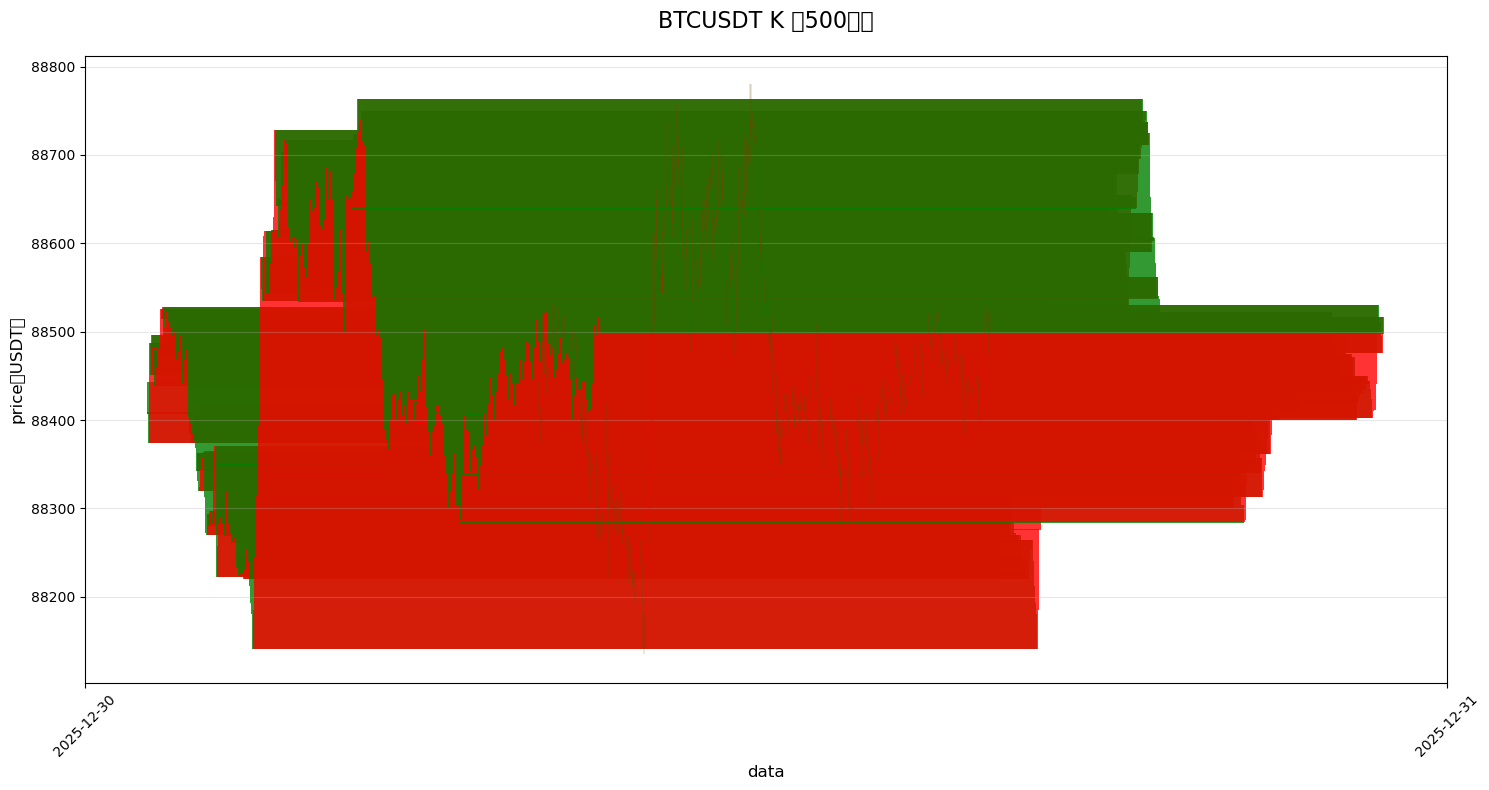

In [333]:
plot_kline_chart(df=kdf, symbol="BTCUSDT")

In [246]:
client.rest_api.top_trader_long_short_ratio_accounts.__dir__()

['__new__',
 '__repr__',
 '__hash__',
 '__call__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce__',
 '__func__',
 '__self__',
 '__doc__',
 '__str__',
 '__init__',
 '__reduce_ex__',
 '__getstate__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [188]:
import os
import logging
import re



from binance_sdk_derivatives_trading_coin_futures.derivatives_trading_coin_futures import (
    DerivativesTradingCoinFutures,
    ConfigurationRestAPI,
    DERIVATIVES_TRADING_COIN_FUTURES_REST_API_PROD_URL,
)

from binance_sdk_derivatives_trading_coin_futures.rest_api.models import (
    TopTraderLongShortRatioPositionsPeriodEnum,
)
# Configure logging
logging.basicConfig(level=logging.INFO)

# Create configuration for the REST API
configuration_rest_api = ConfigurationRestAPI(
    # api_key="66aLkztQkQFuyUQuM83oqYx9ENuZH1SFFbuTSP3ClcGYa9Vqwy5cmQan9QfK7Gzd",
    # api_key= "O0ambiAxVnDs0pDAtlwVs3uiLR7uH2kh5B12WWWmEersKD9uHipkJZ80I90enw4o",
    # api_secret="",
    # api_secret="V4lTk3PUCa7jwGAxPybBFzE7fN2Ob09FZR9BbchLOiGtssRnH9cnkfL2O8C7aoQW",
    base_path= DERIVATIVES_TRADING_COIN_FUTURES_REST_API_PROD_URL,
)

# Initialize DerivativesTradingCoinFutures client
client = DerivativesTradingCoinFutures(config_rest_api=configuration_rest_api)



In [226]:

def top_trader_long_short_ratio_positions():
    try:
        response = client.rest_api.top_trader_long_short_ratio_positions(
            pair="BTCUSD",
            period=TopTraderLongShortRatioPositionsPeriodEnum["PERIOD_5m"].value,
        )
        return response
        logging.info(response)

        rate_limits = response.rate_limits
        logging.info(
            f"top_trader_long_short_ratio_positions() rate limits: {rate_limits}"
        )

        data = response.data()
        # return data
        logging.info(f"top_trader_long_short_ratio_positions() response: {data}")
    except Exception as e:
        logging.error(f"top_trader_long_short_ratio_positions() error: {e}")




In [181]:
data = top_trader_long_short_ratio_positions()

In [182]:
dir(data)

['__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__orig_class__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_data_function',
 '_is_protocol',
 'data',
 'headers',
 'rate_limits',
 'status']

In [183]:
data.data()

[]

In [91]:
import requests

result = requests.get("https://testnet.binancefuture.com/futures/data/delivery-price")

In [92]:
result

<Response [202]>

In [93]:
import requests

result = requests.get("https://demo-fapi.binance.com/futures/data/delivery-price")

In [ ]:
result.json()

In [87]:
result.json()

{'code': -5000,
 'msg': 'Path /fapi/v1/futures/data/topLongShortPositionRatio, Method GET is invalid'}

In [70]:
dir(result.json)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [227]:
import os
import logging

from binance_sdk_derivatives_trading_coin_futures.derivatives_trading_coin_futures import (
    DerivativesTradingCoinFutures,
    ConfigurationRestAPI,
    DERIVATIVES_TRADING_COIN_FUTURES_REST_API_PROD_URL,
)
from binance_sdk_derivatives_trading_coin_futures.rest_api.models import (
    BasisContractTypeEnum,
)
from binance_sdk_derivatives_trading_coin_futures.rest_api.models import BasisPeriodEnum


# Configure logging
logging.basicConfig(level=logging.INFO)

# Create configuration for the REST API
configuration_rest_api = ConfigurationRestAPI(
    # api_key=os.getenv("API_KEY", ""),
    # api_secret=os.getenv("API_SECRET", ""),
    api_key="66aLkztQkQFuyUQuM83oqYx9ENuZH1SFFbuTSP3ClcGYa9Vqwy5cmQan9QfK7Gzd",
    # api_key= "O0ambiAxVnDs0pDAtlwVs3uiLR7uH2kh5B12WWWmEersKD9uHipkJZ80I90enw4o",
    api_secret="V4lTk3PUCa7jwGAxPybBFzE7fN2Ob09FZR9BbchLOiGtssRnH9cnkfL2O8C7aoQW",
    base_path=os.getenv(
        "BASE_PATH", DERIVATIVES_TRADING_COIN_FUTURES_REST_API_PROD_URL
    ),
)

# Initialize DerivativesTradingCoinFutures client
client = DerivativesTradingCoinFutures(config_rest_api=configuration_rest_api)

def ticker24hr_price_change_statistics():
    try:
        response = client.rest_api.ticker24hr_price_change_statistics()

        rate_limits = response.rate_limits
        logging.info(f"ticker24hr_price_change_statistics() rate limits: {rate_limits}")

        data = response.data()
        logging.info(f"ticker24hr_price_change_statistics() response: {data}")
    except Exception as e:
        logging.error(f"ticker24hr_price_change_statistics() error: {e}")

def exchange_information():
    try:
        response = client.rest_api.basis(
            pair="BTCUSD",
            contract_type=BasisContractTypeEnum["PERPETUAL"].value,
            period=BasisPeriodEnum["PERIOD_5m"].value,
        )

        rate_limits = response.rate_limits
        # logging.info(f"exchange_information() rate limits: {rate_limits}")

        data = response.data()
        return data
    # logging.info(f"exchange_information() response: {data}")
    except Exception as e:
        logging.error(f"exchange_information() error: {e}")




In [223]:
data = ticker24hr_price_change_statistics()

INFO:root:ticker24hr_price_change_statistics() rate limits: [RateLimit(rateLimitType='REQUEST_WEIGHT', interval='MINUTE', intervalNum=1, count=40, retryAfter=None)]
INFO:root:ticker24hr_price_change_statistics() response: [Ticker24hrPriceChangeStatisticsResponse(symbol='ETCUSD_PERP', pair='ETCUSD', price_change='-0.103', price_change_percent='-0.864', weighted_avg_price='11.91214118', last_price='11.823', last_qty='15', open_price='11.926', high_price='12.048', low_price='11.784', volume='132378', base_volume='111128.63586065', open_time=1767068220000, close_time=1767154659316, first_id=124316063, last_id=124330264, count=14202, additional_properties={}), Ticker24hrPriceChangeStatisticsResponse(symbol='XRPUSD_260626', pair='XRPUSD', price_change='0.0060', price_change_percent='0.320', weighted_avg_price='1.88572818', last_price='1.8823', last_qty='110', open_price='1.8763', high_price='1.9006', low_price='1.8599', volume='34477', base_volume='182831.22867689', open_time=1767068220000, 

In [224]:
dir(data)

['__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [225]:
data

In [106]:
data.data()

AttributeError: 'ExchangeInformationResponse' object has no attribute 'data'

In [172]:
import os
import logging

from binance_sdk_derivatives_trading_usds_futures.derivatives_trading_usds_futures import (
    DerivativesTradingUsdsFutures,
    ConfigurationRestAPI,
    DERIVATIVES_TRADING_USDS_FUTURES_REST_API_PROD_URL,
)
from binance_sdk_derivatives_trading_usds_futures.rest_api.models import (
    TopTraderLongShortRatioPositionsPeriodEnum,
)


# Configure logging
logging.basicConfig(level=logging.INFO)

# Create configuration for the REST API
configuration_rest_api = ConfigurationRestAPI(
    api_key="66aLkztQkQFuyUQuM83oqYx9ENuZH1SFFbuTSP3ClcGYa9Vqwy5cmQan9QfK7Gzd",
    # api_key= "O0ambiAxVnDs0pDAtlwVs3uiLR7uH2kh5B12WWWmEersKD9uHipkJZ80I90enw4o",
    api_secret="V4lTk3PUCa7jwGAxPybBFzE7fN2Ob09FZR9BbchLOiGtssRnH9cnkfL2O8C7aoQW",
    base_path=os.getenv(
        "BASE_PATH", DERIVATIVES_TRADING_COIN_FUTURES_REST_API_PROD_URL
    ),
    
    # api_key=os.getenv("API_KEY", ""),
    # api_secret=os.getenv("API_SECRET", ""),
    # base_path=os.getenv(
    #     "BASE_PATH", DERIVATIVES_TRADING_USDS_FUTURES_REST_API_PROD_URL
    # ),
)

# Initialize DerivativesTradingUsdsFutures client
client = DerivativesTradingUsdsFutures(config_rest_api=configuration_rest_api)


def top_trader_long_short_ratio_positions():
    try:
        response = client.rest_api.top_trader_long_short_ratio_positions(
            symbol="btcusdt",
            period=TopTraderLongShortRatioPositionsPeriodEnum["PERIOD_5m"].value,
        )

        rate_limits = response.rate_limits
        logging.info(
            f"top_trader_long_short_ratio_positions() rate limits: {rate_limits}"
        )

        data = response.data()
        logging.info(f"top_trader_long_short_ratio_positions() response: {data}")
    except Exception as e:
        logging.error(f"top_trader_long_short_ratio_positions() error: {e}")


if __name__ == "__main__":
    top_trader_long_short_ratio_positions()

ERROR:root:top_trader_long_short_ratio_positions() error: (-1130, "parameter 'pair' is invalid.")
